In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')

In [2]:
#theme used for all plots
style.use("ggplot")

In [3]:
#read csv file
worldData = pd.read_csv("world_data.csv")
worldData

,Country Name,Country Code,Series Name,Series Code,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
0,United States,USA,GDP (current US$),NY.GDP.MKTP.CD,1.752175e+13,1.821930e+13,1.870719e+13,1.948539e+13,2.049410e+13
1,United States,USA,Military expenditure (current USD),MS.MIL.XPND.CD,6.099140e+11,5.961046e+11,6.001064e+11,6.058029e+11,6.487983e+11
2,United States,USA,"Population, total",SP.POP.TOTL,3.183864e+08,3.207427e+08,3.230713e+08,3.251471e+08,3.271674e+08
3,China,CHN,GDP (current US$),NY.GDP.MKTP.CD,1.043853e+13,1.101554e+13,1.113795e+13,1.214349e+13,1.360815e+13
4,China,CHN,Military expenditure (current USD),MS.MIL.XPND.CD,2.007722e+11,2.140931e+11,2.160313e+11,2.278294e+11,2.499969e+11
5,China,CHN,"Population, total",SP.POP.TOTL,1.364270e+09,1.371220e+09,1.378665e+09,1.386395e+09,1.392730e+09
6,Russian Federation,RUS,GDP (current US$),NY.GDP.MKTP.CD,2.059984e+12,1.363594e+12,1.282724e+12,1.578624e+12,1.657554e+12
7,Russian Federation,RUS,Military expenditure (current USD),MS.MIL.XPND.CD,8.469650e+10,6.641871e+10,6.924531e+10,6.652730e+10,6.138755e+10
8,Russian Federation,RUS,"Population, total",SP.POP.TOTL,1.438197e+08,1.440969e+08,1.443424e+08,1.444967e+08,1.444780e+08
9,Germany,DEU,GDP (current US$),NY.GDP.MKTP.CD,3.898727e+12,3.381389e+12,3.495163e+12,3.693204e+12,3.996759e+12


In [4]:
# Cleaning
#drop NaN rows
worldData.dropna(axis=0,inplace=True)

#drop irrelevant columns
worldData.drop(["Series Code","Country Code"],axis=1,inplace=True)

#rename the column names to easier names
worldData.rename(columns={"2014 [YR2014]":"2014","2015 [YR2015]":"2015","2016 [YR2016]":"2016",\
                          "2017 [YR2017]":"2017","2018 [YR2018]":"2018"},inplace=True)

#rename "Series Name" column to easier names
worldData.loc[worldData["Series Name"]=="GDP (current US$)","Series Name"] = "GDP"
worldData.loc[worldData["Series Name"]=="Military expenditure (current USD)","Series Name"] = "Military Expenditure"
worldData.loc[worldData["Series Name"]=="Population, total","Series Name"] = "Population"

#update Korea,Rep to South Korea
worldData.loc[worldData["Country Name"] == "Korea, Rep.","Country Name"] = "South Korea"

worldData

,Country Name,Series Name,2014,2015,2016,2017,2018
0,United States,GDP,1.752175e+13,1.821930e+13,1.870719e+13,1.948539e+13,2.049410e+13
1,United States,Military Expenditure,6.099140e+11,5.961046e+11,6.001064e+11,6.058029e+11,6.487983e+11
2,United States,Population,3.183864e+08,3.207427e+08,3.230713e+08,3.251471e+08,3.271674e+08
3,China,GDP,1.043853e+13,1.101554e+13,1.113795e+13,1.214349e+13,1.360815e+13
4,China,Military Expenditure,2.007722e+11,2.140931e+11,2.160313e+11,2.278294e+11,2.499969e+11
5,China,Population,1.364270e+09,1.371220e+09,1.378665e+09,1.386395e+09,1.392730e+09
6,Russian Federation,GDP,2.059984e+12,1.363594e+12,1.282724e+12,1.578624e+12,1.657554e+12
7,Russian Federation,Military Expenditure,8.469650e+10,6.641871e+10,6.924531e+10,6.652730e+10,6.138755e+10
8,Russian Federation,Population,1.438197e+08,1.440969e+08,1.443424e+08,1.444967e+08,1.444780e+08
9,Germany,GDP,3.898727e+12,3.381389e+12,3.495163e+12,3.693204e+12,3.996759e+12


In [5]:
# Preprocessing
worldData = worldData.set_index(["Country Name","Series Name"]).stack().unstack(1).unstack(1)
worldData

Series Name                  GDP                                            \
                            2014          2015          2016          2017   
Country Name                                                                 
China               1.043853e+13  1.101554e+13  1.113795e+13  1.214349e+13   
France              2.852166e+12  2.438208e+12  2.471286e+12  2.586285e+12   
Germany             3.898727e+12  3.381389e+12  3.495163e+12  3.693204e+12   
Israel              3.100079e+11  3.004708e+11  3.193779e+11  3.532684e+11   
Italy               2.151733e+12  1.832273e+12  1.869202e+12  1.946570e+12   
Russian Federation  2.059984e+12  1.363594e+12  1.282724e+12  1.578624e+12   
Saudi Arabia        7.563503e+11  6.542699e+11  6.449355e+11  6.885861e+11   
South Korea         1.411334e+12  1.382764e+12  1.414804e+12  1.530751e+12   
United Kingdom      3.034729e+12  2.896421e+12  2.659239e+12  2.637866e+12   
United States       1.752175e+13  1.821930e+13  1.870719e+13  1.948539e+13   

Series Name                      Military Expenditure                \
                            2018                 2014          2015   
Country Name                                                          
China               1.360815e+13         2.007722e+11  2.140931e+11   
France              2.777535e+12         6.361357e+10  5.534213e+10   
Germany             3.996759e+12         4.610267e+10  3.981258e+10   
Israel              3.696904e+11         1.848583e+10  1.696943e+10   
Italy               2.073902e+12         2.770103e+10  2.218085e+10   
Russian Federation  1.657554e+12         8.469650e+10  6.641871e+10   
Saudi Arabia        7.824835e+11         8.076240e+10  8.718587e+10   
South Korea         1.619424e+12         3.755233e+10  3.657077e+10   
United Kingdom      2.825208e+12         5.918286e+10  5.386219e+10   
United States       2.049410e+13         6.099140e+11  5.961046e+11   

Series Name                                                     Population  \
                            2016          2017          2018          2014   
Country Name                                                                 
China               2.160313e+11  2.278294e+11  2.499969e+11  1.364270e+09   
France              5.735841e+10  6.041750e+10  6.379968e+10  6.631610e+07   
Germany             4.157949e+10  4.538172e+10  4.947063e+10  8.098250e+07   
Israel              1.478381e+10  1.558161e+10  1.594679e+10  8.215700e+06   
Italy               2.503303e+10  2.644789e+10  2.780751e+10  6.078914e+07   
Russian Federation  6.924531e+10  6.652730e+10  6.138755e+10  1.438197e+08   
Saudi Arabia        6.367280e+10  7.040000e+10  6.755467e+10  3.091699e+07   
South Korea         3.688528e+10  3.917068e+10  4.306997e+10  5.074666e+07   
United Kingdom      4.811894e+10  4.643330e+10  4.999719e+10  6.461316e+07   
United States       6.001064e+11  6.058029e+11  6.487983e+11  3.183864e+08   

Series Name                                                                 
                            2015          2016          2017          2018  
Country Name                                                                
China               1.371220e+09  1.378665e+09  1.386395e+09  1.392730e+09  
France              6.659337e+07  6.685977e+07  6.686514e+07  6.698724e+07  
Germany             8.168661e+07  8.234867e+07  8.265700e+07  8.292792e+07  
Israel              8.380100e+06  8.546000e+06  8.713300e+06  8.883800e+06  
Italy               6.073058e+07  6.062750e+07  6.053671e+07  6.043128e+07  
Russian Federation  1.440969e+08  1.443424e+08  1.444967e+08  1.444780e+08  
Saudi Arabia        3.171767e+07  3.244257e+07  3.309915e+07  3.369995e+07  
South Korea         5.101495e+07  5.124571e+07  5.146620e+07  5.163526e+07  
United Kingdom      6.512886e+07  6.559556e+07  6.605886e+07  6.648899e+07  
United States       3.207427e+08  3.230713e+08  3.251471e+08  3.271674e+08

In [6]:
def parasiteAxesLinePlot(y1AxisData, y2AxisData, xLabel, y1Label, y2Label, y1Color, y2Color, title):
    ''' Creates a dual Y axes Line Plot with a common X axis '''
    fig = plt.figure(figsize = (13,7))
    plt.xticks(rotation=45)
    
    y1 = fig.add_subplot(111)
    y1.plot(y1AxisData, label = y1Label, color = y1Color, marker = "o")
    y1.set_xlabel(xLabel, fontsize = 16)
    
    #set y axis label
    y1.set_ylabel(y1Label, fontsize = 15, color = y1Color)
    #set y axis tick color
    y1.tick_params(axis="y", labelcolor = y1Color)
    #set y axis grid color
    y1.yaxis.grid(True, color = y1Color, alpha = 0.2)
    
    #hide x axis grid
    y1.xaxis.grid(False)

    #twin 'y1' plot keeping x-axis data common
    y2 = y1.twinx()
    
    y2.plot(y2AxisData, label = y2Label, color = y2Color, marker = "o")
    
    #set y axis label
    y2.set_ylabel(y2Label, fontsize = 15, color = y2Color)
    #set y axis tick color
    y2.tick_params(axis = "y", labelcolor = y2Color)
    #set y axis grid color
    y2.yaxis.grid(True, color = y2Color, alpha = 0.2)
    
    #hide x axis grid
    y2.xaxis.grid(False)
    
    lines, labels = y1.get_legend_handles_labels()
    lines2, labels2 = y2.get_legend_handles_labels()
    
    #to handle legends for parasite axes plot
    plt.legend(lines + lines2, labels + labels2, loc="best", fontsize = 13)
    plt.title(title, fontsize = 20)
    plt.show()

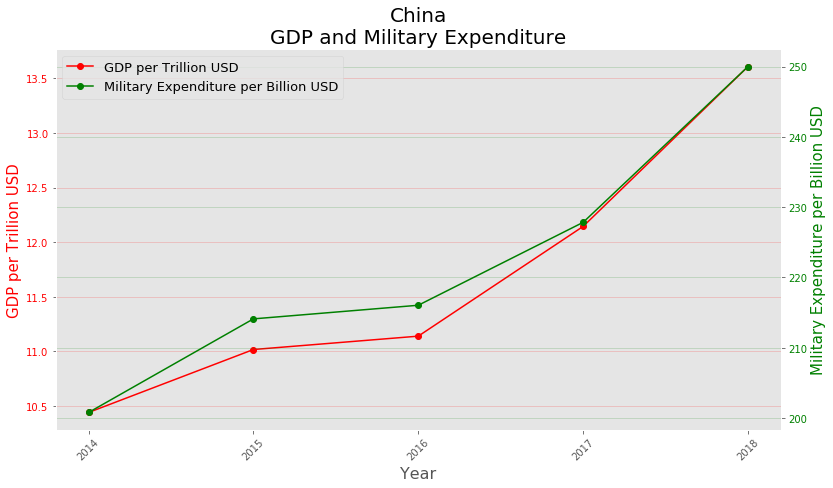

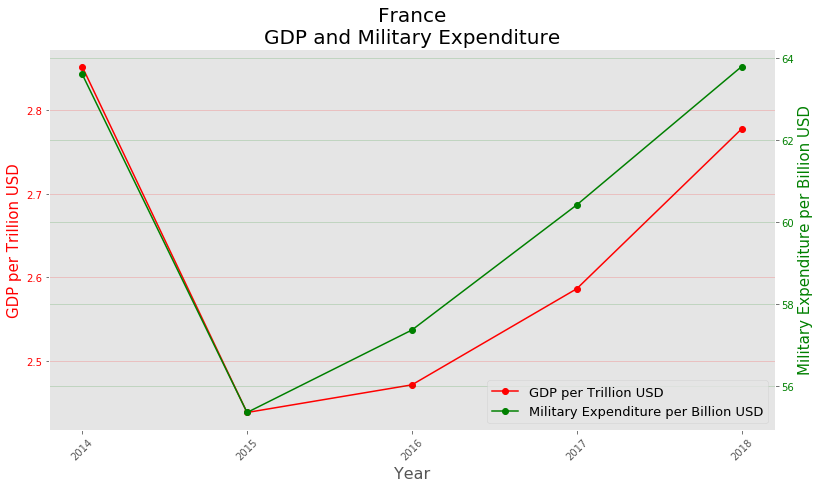

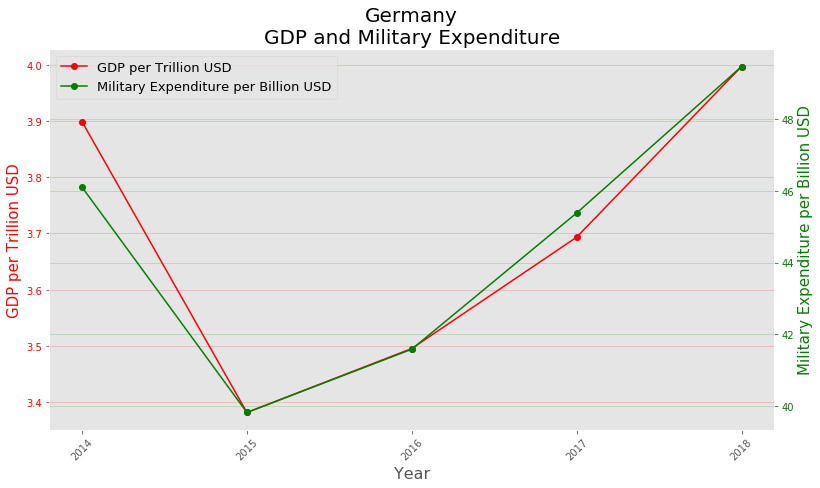

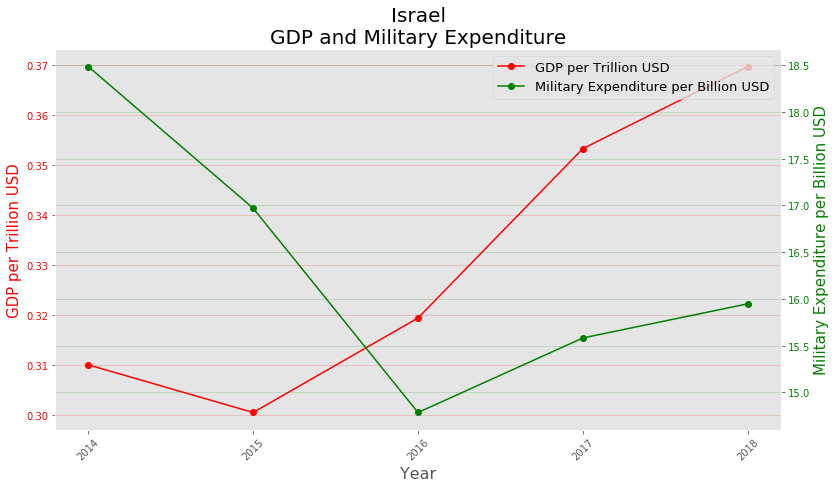

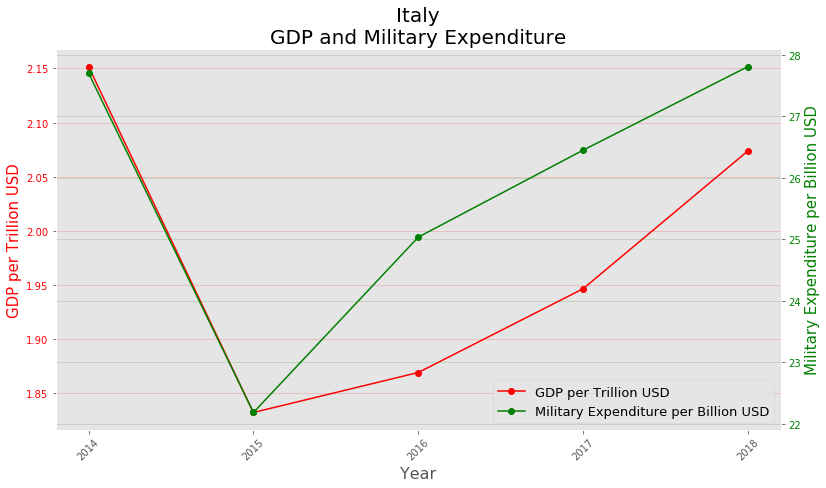

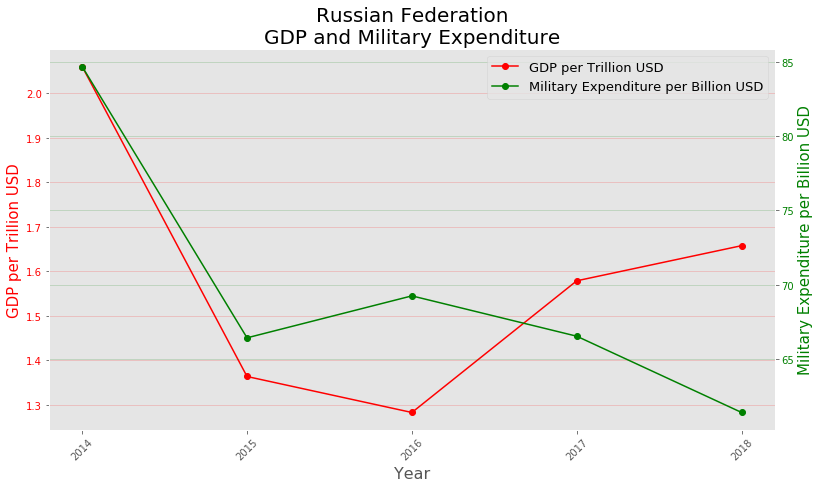

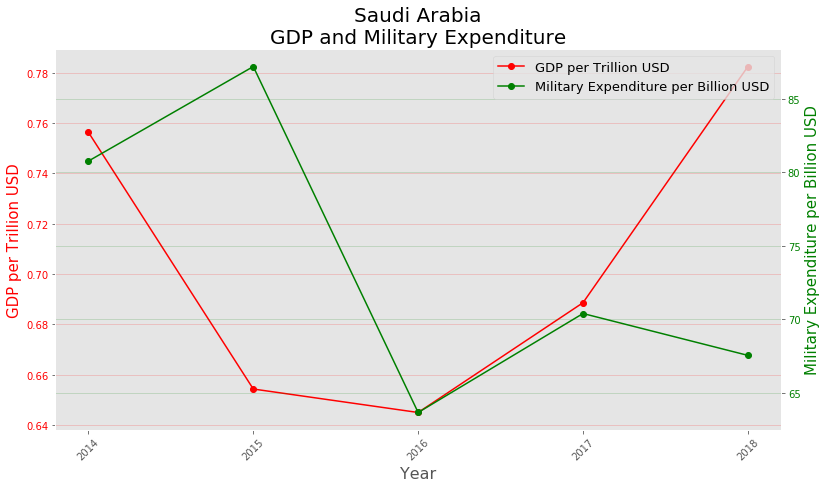

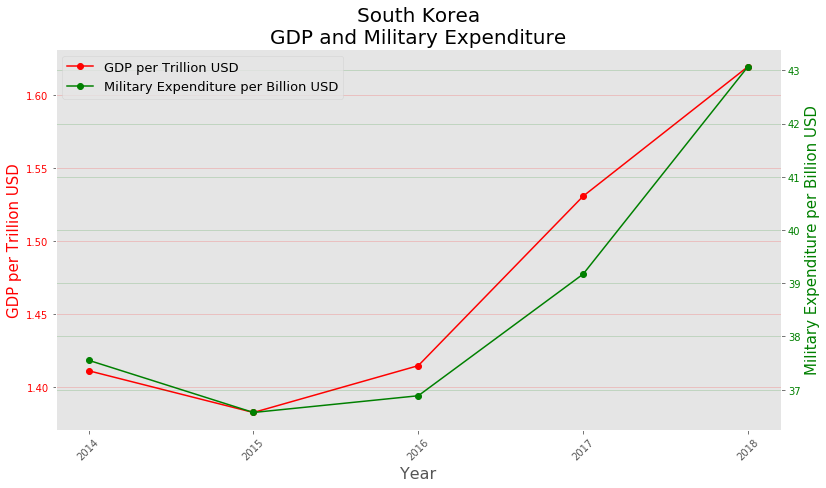

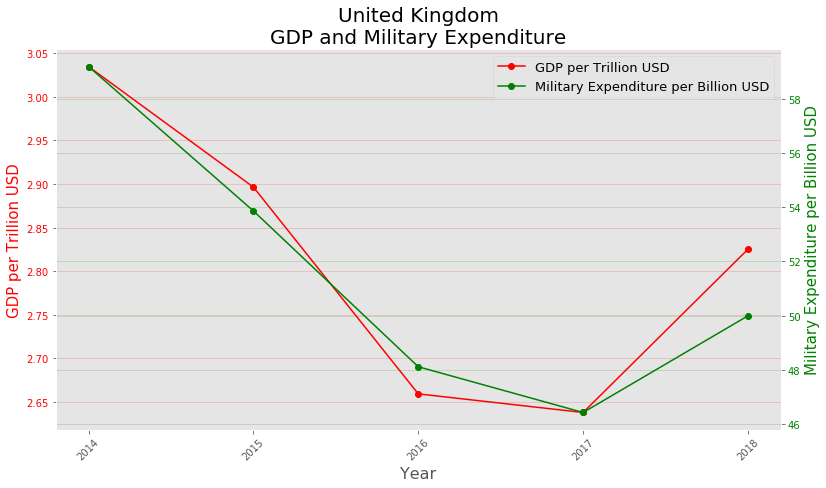

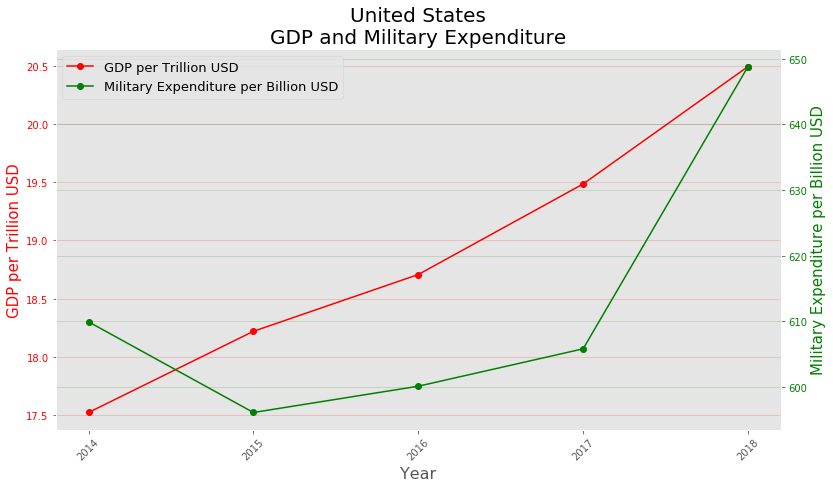

In [7]:
# Compare the military data to that country’s GDP
#iterate over all countries
for country in worldData.index.get_level_values(0).unique():
    parasiteAxesLinePlot(
        # divide by 10**12 to get data in trillions
        y1AxisData = worldData.loc[country,"GDP"]/(10**12),
        # divide by 10**9 to get data in billions
        y2AxisData = worldData.loc[country,"Military Expenditure"]/(10**9),
        xLabel = "Year",
        y1Label = "GDP per Trillion USD",
        y2Label = "Military Expenditure per Billion USD",
        y1Color = "Red",
        y2Color = "Green",
        title = country+"\nGDP and Military Expenditure"
    )

In [8]:
# common color cycle
colorArr = ["sandybrown","salmon","saddlebrown","royalblue","rosybrown","red","rebeccapurple","purple","powderblue","seagreen"]

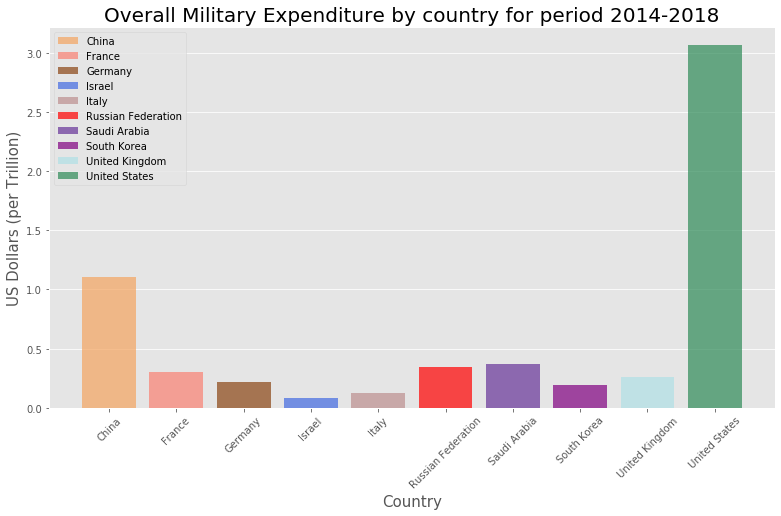

In [9]:
# Compare the overall military spending of the all 10 countries in absolute values
fig = plt.figure(figsize=(13,7))
fig1 = fig.add_subplot(111)

for i,country in enumerate(worldData.index.get_level_values(0).unique()):
    # divide by 10**12 to get data in trillions
    fig1.bar(country,((worldData.loc[country]["Military Expenditure"]).sum())/10**12,label=country,
             alpha=0.7,color=colorArr[i])

fig1.title.set_text("Overall Military Expenditure by country for period 2014-2018")
fig1.title.set_size(20)
fig1.xaxis.grid(False)
fig1.set_ylabel("US Dollars (per Trillion)",fontsize=15)
fig1.set_xlabel("Country",fontsize=15)

plt.xticks(rotation=45)
plt.legend()
plt.show()

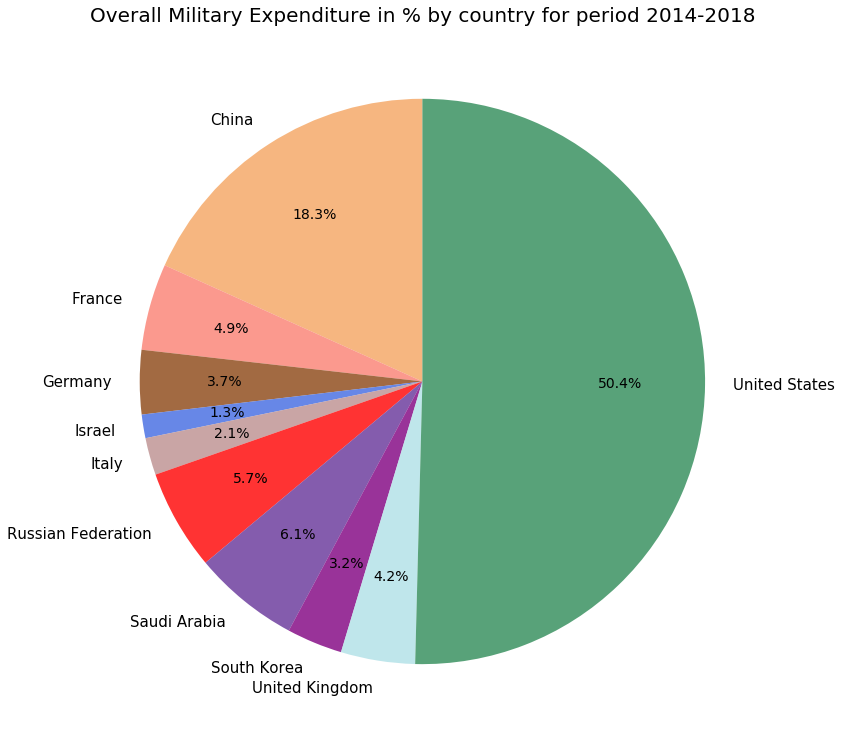

In [10]:
# Compare the overall military spending of the all 10 countries in percentages
#get all unique countries
countries = worldData.index.get_level_values(0).unique()

totalMilitarySpendingPerCountry = []
for country in countries:
    # sum all military expenditure for country for all years
    totalMilitarySpendingPerCountry.append(worldData.loc[country]["Military Expenditure"].sum())

fig = plt.figure(figsize=(13,13))
fig1 = fig.add_subplot(111)
fig1.title.set_text("Overall Military Expenditure in % by country for period 2014-2018")
fig1.title.set_size(20)

#plot the pie chart
wedges, texts, autotexts = fig1.pie(
    #totalMilitarySpendingPerCountry list contains data to plot
    totalMilitarySpendingPerCountry,
    labels=countries,
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.7,
    #colors uses the colorArr which contains our custom colors
    colors=colorArr
)

#sets the size for the percentage text inside each wedge
for autotext in autotexts:
    autotext.set_size(14)
    
#sets the size of label for each wedge
for text in texts:
    text.set_size(15)

#sets opacity property for each edge
for wedge in wedges:
    wedge.set_alpha(0.8)
    
plt.show()

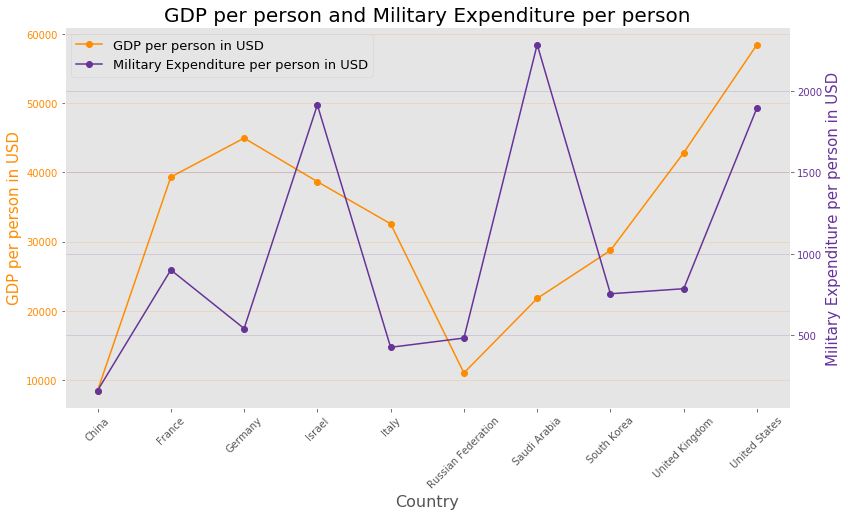

In [11]:
# Compare the per person military spending to the per person GDP in absolute
parasiteAxesLinePlot(
    # per person GDP 
    y1AxisData = worldData["GDP"].mean(axis=1)/(worldData["Population"]).mean(axis=1),
    # per person military spending
    y2AxisData = worldData["Military Expenditure"].mean(axis=1)/(worldData["Population"].mean(axis=1)),
    xLabel = "Country",
    y1Label = "GDP per person in USD",
    y2Label = "Military Expenditure per person in USD",
    y1Color = "darkorange",
    y2Color = "rebeccapurple",
    title="GDP per person and Military Expenditure per person"
)

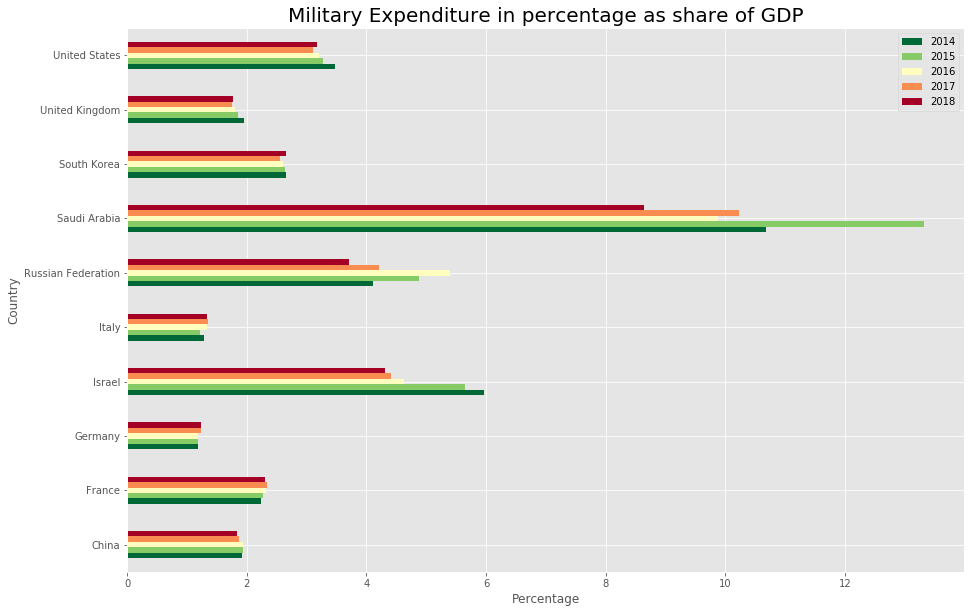

In [12]:
# Compare the per person military expenditure in percentage as a share of GDP.
# create new dataframe which contains percentage of military expenditure as a share of GDP
militaryExpenditureAsGdp = pd.DataFrame()

for country in worldData.index.get_level_values(0).unique():
    # append military expenditure as share of GDP to militaryExpenditureAsGdp dataframe
    militaryExpenditureAsGdp = militaryExpenditureAsGdp.append(
                        ((worldData.loc[country]["Military Expenditure"] / worldData.loc[country]["Population"])
                                                              /
                        (worldData.loc[country]["GDP"]/worldData.loc[country]["Population"]))* 100)
    
    
militaryExpenditureAsGdp.plot(kind='barh',figsize=(15,10),colormap="RdYlGn_r")
plt.title("Military Expenditure in percentage as share of GDP",fontsize=20)
plt.xlabel("Percentage")
plt.ylabel("Country")
plt.legend(loc="best")
plt.show()

In [13]:
# Single out the fastest growing countries in military spending in absolute values
worldData["Military Expenditure"]

,2014,2015,2016,2017,2018
Country Name,,,,,
China,2.007722e+11,2.140931e+11,2.160313e+11,2.278294e+11,2.499969e+11
France,6.361357e+10,5.534213e+10,5.735841e+10,6.041750e+10,6.379968e+10
Germany,4.610267e+10,3.981258e+10,4.157949e+10,4.538172e+10,4.947063e+10
Israel,1.848583e+10,1.696943e+10,1.478381e+10,1.558161e+10,1.594679e+10
Italy,2.770103e+10,2.218085e+10,2.503303e+10,2.644789e+10,2.780751e+10
Russian Federation,8.469650e+10,6.641871e+10,6.924531e+10,6.652730e+10,6.138755e+10
Saudi Arabia,8.076240e+10,8.718587e+10,6.367280e+10,7.040000e+10,6.755467e+10
South Korea,3.755233e+10,3.657077e+10,3.688528e+10,3.917068e+10,4.306997e+10
United Kingdom,5.918286e+10,5.386219e+10,4.811894e+10,4.643330e+10,4.999719e+10


In [14]:
# Single out the fastest growing countries in military spending in absolute values

# Take difference in military spendings for consecutive years
worldData["Military Expenditure Absolute Difference","2014-2015"] =\
                                    worldData["Military Expenditure","2015"]-worldData["Military Expenditure","2014"]
    
worldData["Military Expenditure Absolute Difference","2015-2016"] =\
                                    worldData["Military Expenditure","2016"]-worldData["Military Expenditure","2015"]

worldData["Military Expenditure Absolute Difference","2016-2017"] =\
                                    worldData["Military Expenditure","2017"]-worldData["Military Expenditure","2016"]

worldData["Military Expenditure Absolute Difference","2017-2018"] =\
                                    worldData["Military Expenditure","2018"]-worldData["Military Expenditure","2017"]

worldData["Military Expenditure Absolute Difference"]

,2014-2015,2015-2016,2016-2017,2017-2018
Country Name,,,,
China,1.332087e+10,1.938210e+09,1.179814e+10,2.216748e+10
France,-8.271438e+09,2.016283e+09,3.059084e+09,3.382178e+09
Germany,-6.290097e+09,1.766919e+09,3.802227e+09,4.088906e+09
Israel,-1.516398e+09,-2.185617e+09,7.977937e+08,3.651802e+08
Italy,-5.520189e+09,2.852183e+09,1.414865e+09,1.359621e+09
Russian Federation,-1.827780e+10,2.826601e+09,-2.718005e+09,-5.139757e+09
Saudi Arabia,6.423467e+09,-2.351307e+10,6.727200e+09,-2.845333e+09
South Korea,-9.815594e+08,3.145141e+08,2.285399e+09,3.899291e+09
United Kingdom,-5.320673e+09,-5.743242e+09,-1.685640e+09,3.563889e+09


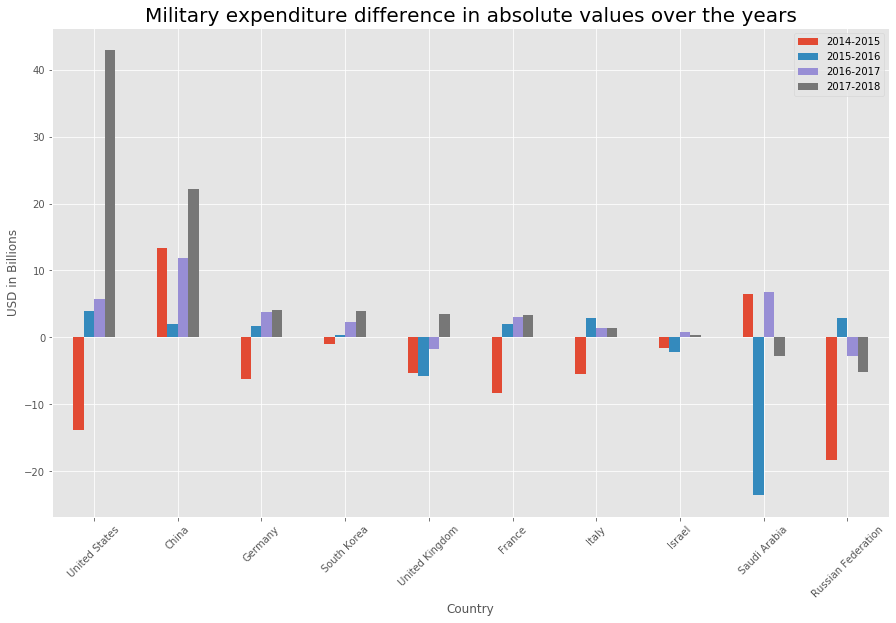

In [15]:
# sort the military spending difference in descending order, sorting is done giving priority to the recent years
sortedChanges = worldData["Military Expenditure Absolute Difference"].sort_values(by=["2017-2018","2016-2017",
                                                                                      "2015-2016","2014-2015"],
                                                                                  ascending=False)

# plot the sortedChanges 
# divide by 10**9 to get data in billions
(sortedChanges[["2014-2015","2015-2016","2016-2017","2017-2018"]]/10**9).plot(kind="bar",figsize=(15,9))
plt.title("Military expenditure difference in absolute values over the years",fontsize=20)
plt.xlabel("Country")
plt.ylabel("USD in Billions")
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.show()

In [16]:
# Single out the fastest growing countries in military spending in percentage

# Take difference in military spendings in percentages for consecutive years
# percentageChange = ((new value - old value) / old value)
worldData["Military Expenditure Percentage Difference","2014-2015 %"]= \
                ((worldData["Military Expenditure","2015"]-worldData["Military Expenditure","2014"])
                     /
                 worldData["Military Expenditure","2014"])*100

worldData["Military Expenditure Percentage Difference","2015-2016 %"]= \
                ((worldData["Military Expenditure","2016"]-worldData["Military Expenditure","2015"])
                     /
                 worldData["Military Expenditure","2015"])*100

worldData["Military Expenditure Percentage Difference","2016-2017 %"]= \
                ((worldData["Military Expenditure","2017"]-worldData["Military Expenditure","2016"])
                     /
                 worldData["Military Expenditure","2016"])*100

worldData["Military Expenditure Percentage Difference","2017-2018 %"]= \
                ((worldData["Military Expenditure","2018"]-worldData["Military Expenditure","2017"])
                     /
                 worldData["Military Expenditure","2017"])*100


worldData["Military Expenditure Percentage Difference"]

,2014-2015 %,2015-2016 %,2016-2017 %,2017-2018 %
Country Name,,,,
China,6.634816,0.905312,5.461310,9.729860
France,-13.002631,3.643305,5.333279,5.598010
Germany,-13.643670,4.438092,9.144477,9.010028
Israel,-8.203027,-12.879732,5.396399,2.343662
Italy,-19.927737,12.858765,5.651993,5.140754
Russian Federation,-21.580343,4.255731,-3.925184,-7.725786
Saudi Arabia,7.953536,-26.968897,10.565265,-4.041667
South Korea,-2.613844,0.860015,6.195964,9.954617
United Kingdom,-8.990227,-10.662846,-3.503070,7.675287


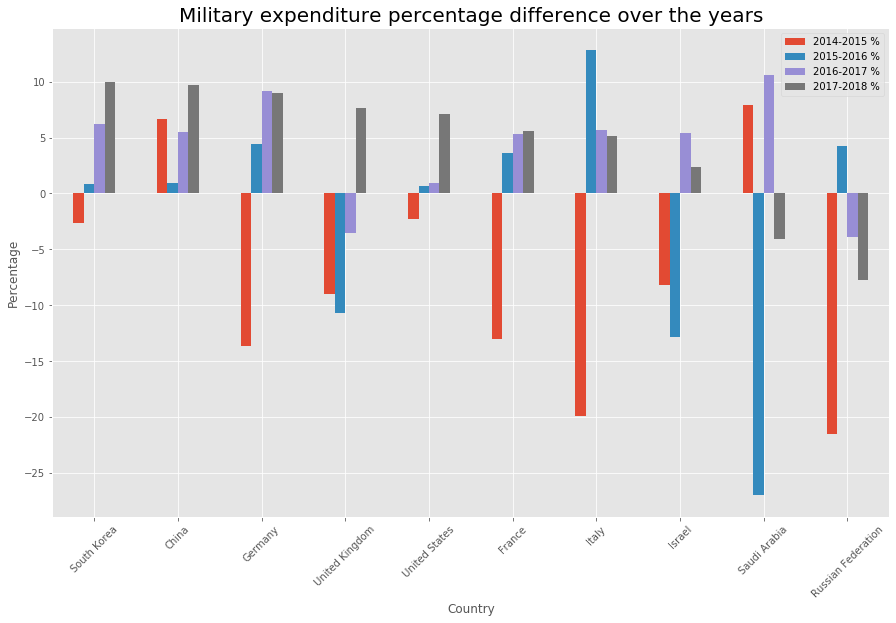

In [17]:
# sort the military spending difference percentage in descending order, sorting is done giving priority to the recent years
sortedChangesPct = worldData["Military Expenditure Percentage Difference"].sort_values(by=["2017-2018 %",
                                                                                           "2016-2017 %",
                                                                                           "2015-2016 %",
                                                                                           "2014-2015 %"],
                                                                                       ascending=False)

# plot the sortedChangesPct 
(sortedChangesPct[["2014-2015 %","2015-2016 %","2016-2017 %","2017-2018 %"]]).plot(kind="bar",figsize=(15,9))
plt.title("Military expenditure percentage difference over the years",fontsize=20)
plt.xlabel("Country")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.show()